In [1]:
# load dependencies
from matplotlib import pyplot as plt
import pandas as pd
from sqlalchemy import create_engine
import scipy.stats as st
import seaborn as sns

In [2]:
# read in files
happiness_2018_index = pd.read_csv('../Data/happiness_index_2018.csv')
alcohol_consumption = pd.read_csv('../Data/alcohol_consumption.csv')
consumption_type = pd.read_csv('../Data/drinks_csv.csv')

# merge csv files
df = pd.merge(happiness_2018_index, alcohol_consumption, on='Country', how='outer')
df = pd.merge(df, consumption_type, on='Country', how='outer')


# check the file has been read in
df

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Country Code,...,2000,2005,2010,2015,2018,con,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,1.0,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,FIN,...,11.69,13.11,12.59,11.18,10.78,finland,263.0,133.0,97.0,10.0
1,2.0,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,NOR,...,7.95,8.87,8.94,7.52,7.41,norway,169.0,71.0,129.0,6.7
2,3.0,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,DNK,...,12.67,12.29,11.00,10.36,10.26,denmark,224.0,81.0,278.0,10.4
3,4.0,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,ISL,...,7.03,7.74,7.50,8.74,9.12,iceland,233.0,61.0,78.0,6.6
4,5.0,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,CHE,...,12.49,11.64,11.41,11.58,11.53,switzerland,185.0,100.0,280.0,10.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,NaN,St. Kitts & Nevis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,st. kitts & nevis,194.0,205.0,32.0,7.7
296,NaN,St. Vincent & The Grenadines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,st. vincent & the grenadines,120.0,221.0,11.0,6.3
297,NaN,Sao Tome & Principe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,sao tome & principe,56.0,38.0,140.0,4.2
298,NaN,Swaziland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,swaziland,90.0,2.0,2.0,4.7


In [3]:
# clean dataframe with only the relevant data
df = df[['Country', 'Country Code', 'Score', 'GDP per capita',"Social support", 'Healthy life expectancy', "Freedom to make life choices",
         'Generosity', 'Perceptions of corruption','2018', 'beer_servings', 'spirit_servings', 'wine_servings']]

# check dataframe for any errors
df = df.dropna()

# rename columns

df =df.rename(columns={"Country Code": "con_code", 
                       "GDP per capita": "GDP", 
                       "Social support": "social",
                       "Healthy life expectancy": "life_expectancy",
                       "Freedom to make life choices": "freedom",
                       'Perceptions of corruption': "corruption",
                       "2018": "alcohol_consumption"
                      })

df

,Country,con_code,Score,GDP,social,life_expectancy,freedom,Generosity,corruption,alcohol_consumption,beer_servings,spirit_servings,wine_servings
0,Finland,FIN,7.632,1.305,1.592,0.874,0.681,0.202,0.393,10.78,263.0,133.0,97.0
1,Norway,NOR,7.594,1.456,1.582,0.861,0.686,0.286,0.340,7.41,169.0,71.0,129.0
2,Denmark,DNK,7.555,1.351,1.590,0.868,0.683,0.284,0.408,10.26,224.0,81.0,278.0
3,Iceland,ISL,7.495,1.343,1.644,0.914,0.677,0.353,0.138,9.12,233.0,61.0,78.0
4,Switzerland,CHE,7.487,1.420,1.549,0.927,0.660,0.256,0.357,11.53,185.0,100.0,280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Liberia,LBR,3.495,0.076,0.858,0.267,0.419,0.206,0.030,6.12,19.0,152.0,2.0
150,Rwanda,RWA,3.408,0.332,0.896,0.400,0.636,0.200,0.444,8.95,43.0,2.0,0.0
152,Tanzania,TZA,3.303,0.455,0.991,0.381,0.481,0.270,0.097,11.27,36.0,6.0,1.0
154,Central African Republic,CAF,3.083,0.024,0.000,0.010,0.305,0.218,0.038,2.38,17.0,2.0,1.0


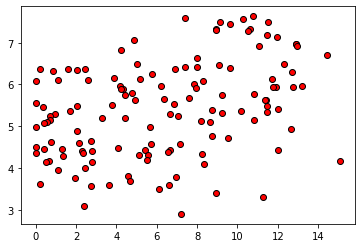

<Figure size 432x288 with 0 Axes>

In [4]:
# data check to see if this is an interesting enough correlation to explore
alcohol_c = df["alcohol_consumption"]
score = df['Score']

# create and format plot
plt.scatter(alcohol_c, score, marker="o", facecolors="red", edgecolors="black")

# show plot
plt.show()
plt.tight_layout()


In [5]:
# calculating correlation score

corr = st.pearsonr(alcohol_c,score)

corr

(0.3767996697635171, 8.460474354828837e-06)

In [6]:
df.describe()

,Score,GDP,social,life_expectancy,freedom,Generosity,corruption,alcohol_consumption,beer_servings,spirit_servings,wine_servings
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.00000,132.000000,132.000000
mean,5.418758,0.881833,1.227333,0.596636,0.468697,0.180667,0.116674,6.286636,116.50000,78.848485,58.393939
std,1.136180,0.384889,0.300493,0.249090,0.160986,0.101288,0.100331,4.120015,106.87265,78.284418,87.235380
min,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003000,0.00000,0.000000,0.000000
25%,4.445500,0.601750,1.093000,0.413750,0.378750,0.109500,0.051750,2.457500,21.00000,6.000000,1.000000
50%,5.441000,0.950000,1.280000,0.655500,0.503500,0.171500,0.082000,6.300000,78.50000,68.500000,9.000000
75%,6.272500,1.179000,1.466500,0.782000,0.585250,0.239000,0.142500,9.542500,207.75000,119.000000,94.750000
max,7.632000,1.649000,1.644000,1.008000,0.724000,0.598000,0.457000,15.090000,376.00000,373.000000,370.000000


In [7]:
happyCountries = df[(df.Score > 7)]

happyCountries.describe()

,Score,GDP,social,life_expectancy,freedom,Generosity,corruption,alcohol_consumption,beer_servings,spirit_servings,wine_servings
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,7.372538,1.317231,1.542154,0.885615,0.643538,0.284077,0.284846,9.692308,217.538462,88.846154,163.230769
std,0.177600,0.107447,0.062055,0.028745,0.057912,0.064976,0.114106,1.928022,43.068967,24.354487,77.639288
min,7.072000,1.010000,1.433000,0.817000,0.464000,0.143000,0.082000,4.870000,149.000000,60.000000,11.000000
25%,7.272000,1.305000,1.501000,0.874000,0.638000,0.256000,0.224000,8.940000,185.000000,72.000000,100.000000
50%,7.328000,1.341000,1.549000,0.888000,0.659000,0.285000,0.302000,10.260000,224.000000,81.000000,186.000000
75%,7.495000,1.355000,1.590000,0.910000,0.677000,0.333000,0.383000,10.780000,251.000000,100.000000,195.000000
max,7.632000,1.456000,1.644000,0.927000,0.686000,0.365000,0.408000,11.960000,279.000000,133.000000,280.000000


In [8]:
sadCountries = df[(df.Score < 4)]

sadCountries.describe()

,Score,GDP,social,life_expectancy,freedom,Generosity,corruption,alcohol_consumption,beer_servings,spirit_servings,wine_servings
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,3.574467,0.350133,0.796400,0.262133,0.332133,0.180200,0.100867,4.720667,54.600000,43.666667,7.666667
std,0.303548,0.254742,0.325643,0.117467,0.205329,0.082082,0.098754,3.093393,63.683144,87.346328,14.074631
min,2.905000,0.024000,0.000000,0.010000,0.000000,0.042000,0.030000,0.210000,0.000000,0.000000,0.000000
25%,3.451500,0.222500,0.584000,0.229500,0.153000,0.140500,0.055000,2.420000,13.000000,2.000000,0.500000
50%,3.590000,0.332000,0.858000,0.267000,0.406000,0.185000,0.092000,4.590000,36.000000,11.000000,1.000000
75%,3.784500,0.406000,1.042500,0.343500,0.457500,0.208000,0.100000,6.765000,73.000000,32.000000,4.000000
max,3.999000,1.017000,1.215000,0.417000,0.636000,0.392000,0.444000,11.270000,217.000000,326.000000,45.000000


### CREATE DATABASE CONNECTION

In [16]:
#create connection
import psycopg2
connection = psycopg2.connect(
    host = 'project3.cexcs0a519gc.us-west-1.rds.amazonaws.com',
    port = 5432,
    user = 'postgres',
    password = 'postgres',
    database='project3'
    )
cursor=connection.cursor()

In [17]:
csv_file = "../Data/df.csv"
df = pd.read_csv(csv_file)
df.head()


,Country,con_code,Score,GDP,social,life_expectancy,freedom,Generosity,corruption,alcohol_consumption,beer_servings,spirit_servings,wine_servings
0,Finland,FIN,7.632,1.305,1.592,0.874,0.681,0.202,0.393,10.78,263.0,133.0,97.0
1,Norway,NOR,7.594,1.456,1.582,0.861,0.686,0.286,0.340,7.41,169.0,71.0,129.0
2,Denmark,DNK,7.555,1.351,1.590,0.868,0.683,0.284,0.408,10.26,224.0,81.0,278.0
3,Iceland,ISL,7.495,1.343,1.644,0.914,0.677,0.353,0.138,9.12,233.0,61.0,78.0
4,Switzerland,CHE,7.487,1.420,1.549,0.927,0.660,0.256,0.357,11.53,185.0,100.0,280.0


In [23]:
param_dic = {
    "host"      : "project3.cexcs0a519gc.us-west-1.rds.amazonaws.com",
    "database"  : "project3",
    "user"      : "postgres",
    "password"  : "postgres"
}
 

In [24]:
connect = "postgresql+psycopg2://%s:%s@%s:5432/%s" % (
    param_dic['user'],
    param_dic['password'],
    param_dic['host'],
    param_dic['database']
)

def to_alchemy(df):
    """
    Using a dummy table to test this call library
    """
engine = create_engine(connect)
df.to_sql(
        'df', 
        con=engine, 
        index=False, 
        if_exists='replace'
    )
print("to_sql() done (sqlalchemy)")

to_sql() done (sqlalchemy)


In [25]:
# Confirm tables
engine.table_names()

['df']